In [1]:

pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split
import os 

# Image Preprocessing

In [5]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        print(f"label {label} is done!")
      
        if os.path.isdir(label_path):
            for img_name in os.listdir(label_path):
                img_path = os.path.join(label_path, img_name)
                img = Image.open(img_path).convert('L')  # Convert to grayscale
                img = img.resize((28, 28))  # Resize to 28x28 pixels
                images.append(np.array(img))
                labels.append(int(label))
    
    return np.array(images), np.array(labels)



In [7]:
images, labels = load_images_from_folder('dataset')


label 0 is done!
label 1 is done!
label 2 is done!
label 3 is done!
label 4 is done!
label 5 is done!
label 6 is done!
label 7 is done!
label 8 is done!
label 9 is done!


In [9]:
X = images
Y = labels

print(X.shape)
print(Y)

(21555, 28, 28)
[0 0 0 ... 9 9 9]


# Splitting the dataset

In [11]:



X_train,x_,Y_train, y_ = train_test_split(X,Y,test_size = 0.40, random_state = 1)
X_cv,X_test, Y_cv, Y_test = train_test_split(x_,y_,test_size = 0.50, random_state = 1)



# Normalizing the inputs

In [13]:


X_train= X_train/255
X_cv = X_cv/255
X_test= X_test/255



# Adding an additional dimension

In [15]:
X_train = np.expand_dims(X_train, axis=-1)
X_cv = np.expand_dims(X_cv, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [17]:

print("Training set:",np.shape(X_train), np.shape(Y_train))
print("Cross-validation set:", np.shape(X_cv), np.shape(Y_cv))
print("Test set:", np.shape(X_test), np.shape(Y_test))

Training set: (12933, 28, 28, 1) (12933,)
Cross-validation set: (4311, 28, 28, 1) (4311,)
Test set: (4311, 28, 28, 1) (4311,)


# Model Architecture

In [19]:
model = Sequential(
  [Conv2D(16,(3,3), activation = 'relu'),
   MaxPool2D(pool_size = 2, strides = 2),
   Conv2D(32, (3,3), activation = 'relu'),
   MaxPool2D(pool_size = 2,strides = 2),
 
   tf.keras.layers.Flatten(),
  Dense(units = 128, activation = "relu"),
  Dense(units = 10, activation = "linear")]
)

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), optimizer = tf.keras.optimizers.Adam(0.001))
model.fit(X_train,Y_train,epochs = 100)

Epoch 1/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.9515
Epoch 2/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.6809
Epoch 3/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3944
Epoch 4/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2919
Epoch 5/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2126
Epoch 6/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1750
Epoch 7/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1491
Epoch 8/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1188
Epoch 9/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1025
Epoch 10/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0800
Epoch 11/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0672
Epoch 12/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0572
Epoch 13/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0470
Epoch 14/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0480
Epoch 15/100
405/405 ━━━━━━━━━━━━━━━━━━━━ 2

# Making Predictions

In [21]:
def make_predictions(X):
    y = model.predict(X)
    prediction = tf.nn.softmax(y).numpy()

    row= prediction.shape[0]
    yhat = np.zeros(row)
    for i in range(row):
        yhat[i] = np.argmax(prediction[i])
    return yhat
     



# Computing error

In [23]:
def compute_error(yhat, y):
      correct_predictions = tf.equal(yhat, y)
      accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
      error = 1-accuracy

      return error.numpy()

# Training Error

In [32]:
y = make_predictions(X_train)
error = compute_error(y,Y_train)
print(error)


405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
0.0


# Cross validation error

In [35]:
y = make_predictions(X_cv)
error = compute_error(y,Y_cv)
print(error)


135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.039434016


# Test Set Error

In [38]:
y = make_predictions(X_test)
error = compute_error(y,Y_test)
print(error)


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.037346303


# Infering for the first 10 examples in the test set

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The prediction is 0.0


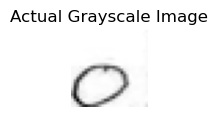

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The prediction is 7.0


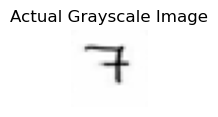

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
The prediction is 0.0


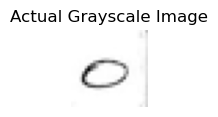

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
The prediction is 3.0


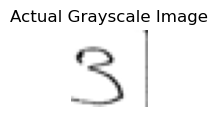

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The prediction is 6.0


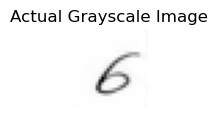

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
The prediction is 2.0


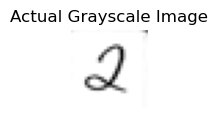

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The prediction is 0.0


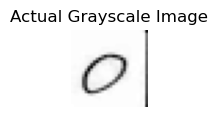

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The prediction is 7.0


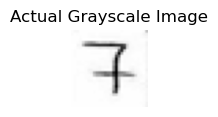

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The prediction is 9.0


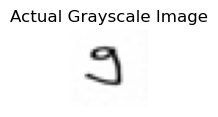

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The prediction is 6.0


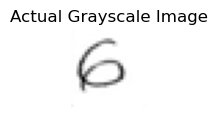

In [67]:

for i in range(10):
   y = make_predictions(np.expand_dims(X_test[i],axis = 0))
   print(f"The prediction is {y[0]}")
   X_reduced = np.squeeze(X_test[i])#reducing the tensor dimension
   X_reduced = X_reduced*255
   plt.figure(figsize=(1,1))
   plt.imshow(X_reduced,cmap = 'gray')
   plt.title("Actual Grayscale Image")
   plt.axis("off")
   plt.show()


